# End-to-End Machine Learning Project
### Working with Real Data

#### Project life-cycle
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Present your solution.

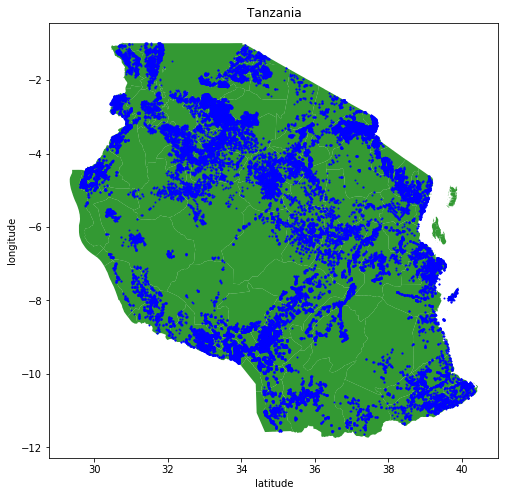

## 1. Look at the big picture.

### Frame the Problem
1. The first question to ask is what exactly is the objective.
**Predict if a water pump is: functional, needs repair, non functional**
2. How does the company expect to use and benefit from this model?
**Plan the maintenance, reduce the time to organize.**
3. The next question to ask is what the current solution looks like (if any). It will often give you a reference performance, as well as insights on how to solve the problem.
4. First, you need to frame the problem: is it supervised or unsupervised? Is it a classification task, a regression task, or something else? **Supervised learning, Classification task**

## 2. Get the data

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [ ]:
workshop_columns = ['date_recorded','construction_year',
                'gps_height','longitude', 'latitude',
                'basin','region','district_code',
                'population','extraction_type_class',
                'management_group','quality_group',
                'quantity','source_type', 'waterpoint_type',
               'scheme_name','recorded_by','payment_type', 'payment', 'status_group']

## 3. Discover and Visualize the Data to Gain Insights

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data.basin, palette='deep')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data.extraction_type_class, palette = 'deep')
plt.show()

In [ ]:
# Not useful
plt.figure(figsize=(20,5))
sns.countplot(data.management_group, palette = 'deep')
plt.show()

plt.figure(figsize=(20,5))
sns.countplot(data.quality_group, palette = 'deep')
plt.show()

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(data.quantity, palette = 'deep')
plt.show()

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(data.source_type, palette = 'deep')
plt.show()

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(data.waterpoint_type, palette = 'deep')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data.payment, palette = 'deep')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data.payment_type, palette = 'deep')
plt.show()

In [ ]:
#looking at regions to find the most critical ones


Numeric variables

In [ ]:
data['population'].replace(0.0, np.nan, inplace=True)

In [ ]:
data["population"].fillna(data.groupby(['region', 'district_code'])["population"].transform("mean"), inplace=True)
data["population"].fillna(data.groupby(['region'])["population"].transform("mean"), inplace=True)
data["population"].fillna(data["population"].mean(), inplace=True)

In [ ]:
data

## 4. Prepare the Data for Machine Learning Algorithms

In [ ]:
algo_columns = ["gps_height","longitude","latitude","basin", "region","population",
"extraction_type_class","quantity","source_type", "waterpoint_type","payment", "operational_year","status_group"]

In [ ]:
#Encode target labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder


In [ ]:
df.head()

Transform categorical features to numeric

In [ ]:
df['Basin'] = pd.factorize(df.basin.values)[0]
df['Region'] = pd.factorize(df.region.values)[0]
df['Extraction_type_class'] = pd.factorize(df.extraction_type_class.values)[0]
df['Quantity'] = pd.factorize(df.quantity.values)[0]
df['Source_type'] = pd.factorize(df.source_type.values)[0]
df['Waterpoint_type'] = pd.factorize(df.waterpoint_type.values)[0]
df['Payment'] = pd.factorize(df.payment.values)[0]

In [ ]:
df.head()

In [ ]:
df = df.drop(columns=['basin','region','payment', 'extraction_type_class','quantity','source_type','waterpoint_type','status_group'])

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split


## 5. Select a model and train it.

In [ ]:
from sklearn.tree import DecisionTreeClassifier



In [ ]:
from sklearn.ensemble import RandomForestClassifier



In [ ]:
#the predicted class for each sample in X is returned


In [ ]:
print("Decision Tree Accuracy")


In [ ]:
print("Random Forest Accuracy")


In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, prediction_dt)

matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="summer")

#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =10)
ax.set_ylabel("True Label", fontsize=10)
plt.show()

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            prediction_rf)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="summer")

#set axis titles
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =10)
ax.set_ylabel("True Label", fontsize=10)
plt.show()

In [ ]:
print("Decision Tree")
print(metrics.classification_report(y_test,prediction_dt))
print("Random Forest")
print(metrics.classification_report(y_test,prediction_rf))

Bonus

In [ ]:
import geopandas

In [ ]:
maps = geopandas.read_file("Demo/tn398yw9512.shp")
gdf = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.longitude, data.latitude))

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
maps.plot(ax=ax, color='green',alpha=0.8)
gdf.plot(ax=ax, color='blue',alpha = 0.9, markersize=1)
plt.title("Tanzania")
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()